In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from PIL import Image
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
# Data Preparation: Assuming you have collected the images in folders
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder(root='/Users/dong-ju/Documents/My_code/file_images/images/', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [ ]:
# Define the CNN Architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        self.conv2 = nn.Conv2d(16, 32, 3)
        # self.fc1 = nn.Linear(32 * 62 * 62, 256)
        self.fc1 = nn.Linear(2032128, 256)  # Adjusted input dimension
        self.fc2 = nn.Linear(256, 2)  # Assuming 2 classes: benign and malicious

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

        

In [ ]:
# Initialize model, loss, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training Loop
for epoch in range(10):  # Loop over the dataset multiple times
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        print(f"[Epoch {epoch + 1}, Mini-batch {i + 1}] loss: {loss.item()}")

print("Finished Training")

In [21]:
# TEST AREA
# Load the image
image_path = "/Users/dong-ju/Documents/My_code/file_images/images/malicious/tailwind.config.png"
input_image = Image.open(image_path)
input_image = input_image.convert("RGB")

# Preprocess the image (based on your training data preprocessing)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

# Check if a GPU is available and if not, use a CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the input and model to GPU for speed if available
input_batch = input_batch.to(device)
# model.to(device)

# Run a forward pass
with torch.no_grad():
    output = model(input_batch)

# Get the predicted label (argmax of the softmax output)
_, predicted_idx = torch.max(output, 1)
class_labels = ["malicious", "not maliciouss"]  # Replace with your actual class labels

print(f"Predicted class: {class_labels[predicted_idx.item()]}")

Predicted class: not maliciouss


In [22]:
probabilities = F.softmax(output, dim=1)
confidence = probabilities[0][predicted_idx].item()
print(f"Confidence: {confidence * 100:.2f}%")

Confidence: 100.00%


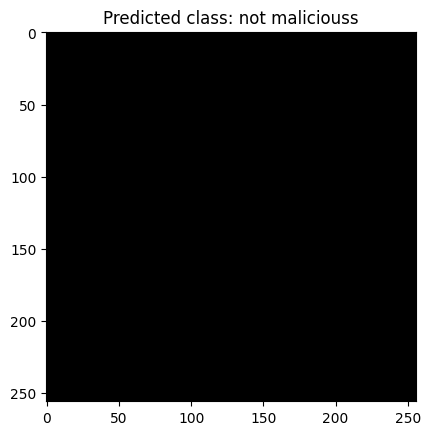

In [23]:
plt.imshow(input_image)
plt.title(f"Predicted class: {class_labels[predicted_idx.item()]}")
plt.show()